IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
import seaborn as sns
rcParams['figure.figsize']=10,8
from sklearn.model_selection import train_test_split

READING DATA FROM CSV

In [2]:
UCI=pd.read_csv('UCI.csv')
UCI.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10-03-2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10-03-2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10-03-2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10-03-2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10-03-2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [3]:
UCI.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')

In [4]:
columns_to_drop = ['Unnamed: 15', 'Unnamed: 16']
UCI.drop(columns=columns_to_drop, inplace=True)

DATA PREPROCESSING

 Handling Missing Values:
 

In [7]:
UCI.dropna(how='all',inplace=True)

UCI.dropna(thresh=10,axis=0,inplace=True)

In [9]:
UCI.isnull().sum()

Date             114
Time             114
CO(GT)             0
PT08.S1(CO)        0
NMHC(GT)           0
C6H6(GT)           0
PT08.S2(NMHC)      0
NOx(GT)            0
PT08.S3(NOx)       0
NO2(GT)            0
PT08.S4(NO2)       0
PT08.S5(O3)        0
T                  0
RH                 0
AH                 0
dtype: int64

correlation matrix

In [16]:
NUCI=pd.DataFrame()
for column in UCI.columns:
    if UCI[column].dtype != 'object':  
        NUCI[column]=UCI[column]
NUCI.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


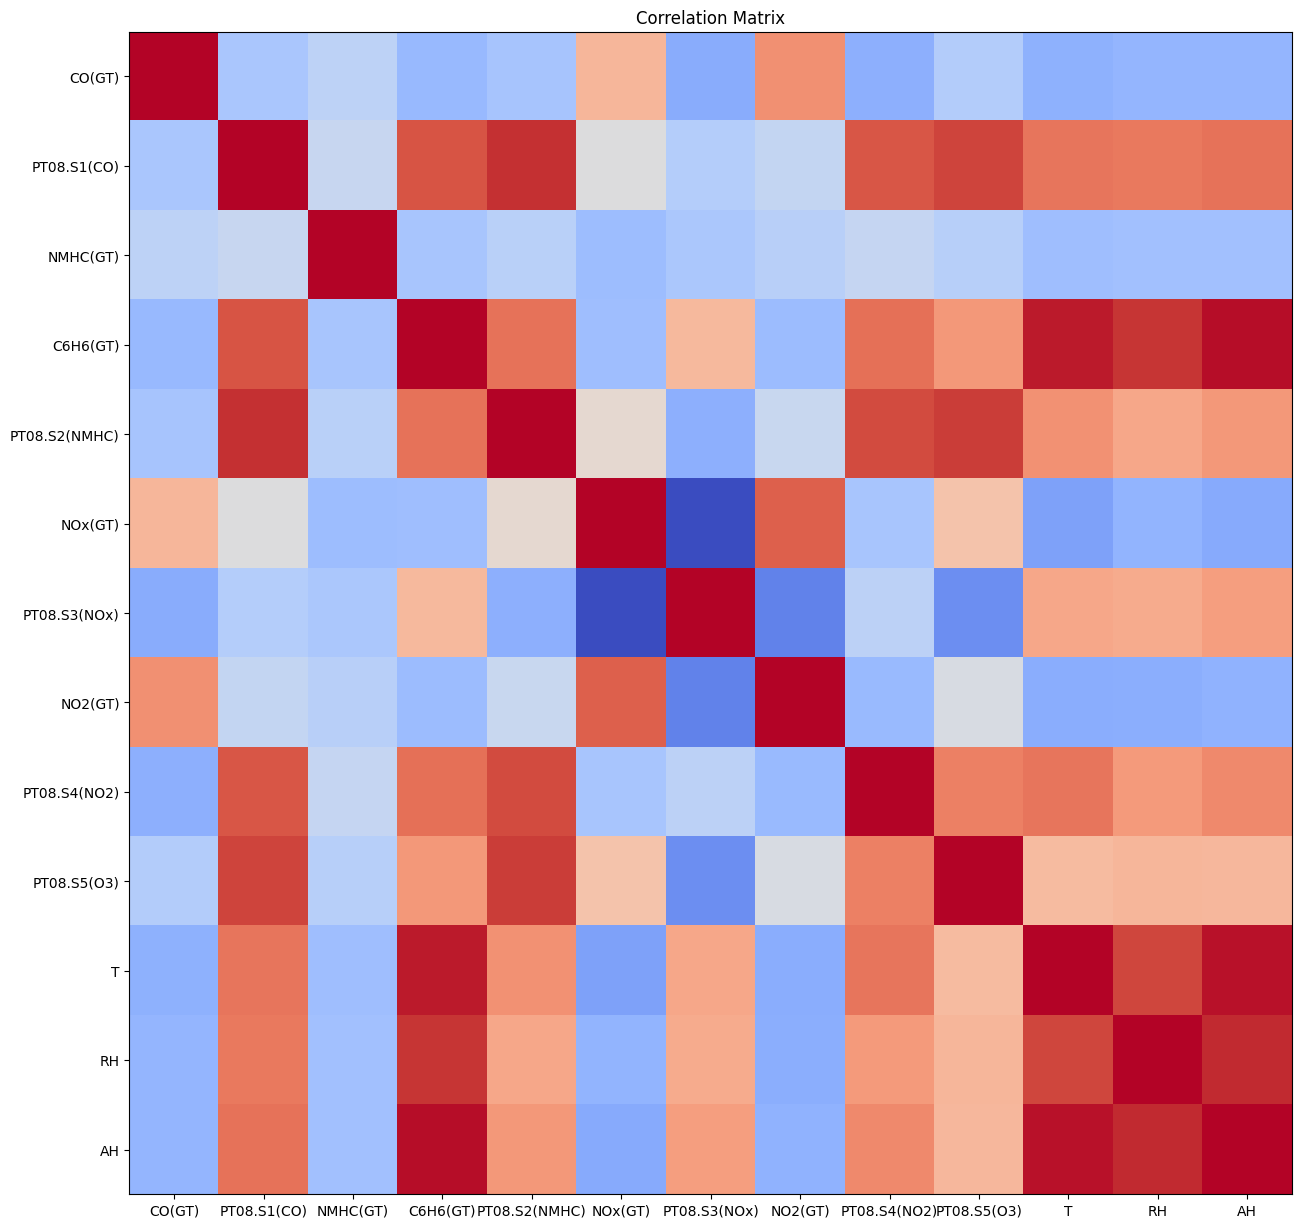

In [17]:
corr_matrix=NUCI.corr()
plt.figure(figsize=(15, 25))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.title('Correlation Matrix')
plt.xticks(ticks=np.arange(len(corr_matrix.columns)), labels=corr_matrix.columns)
plt.yticks(ticks=np.arange(len(corr_matrix.index)), labels=corr_matrix.index)
plt.show()

OUTLINERS

In [18]:
for column_name in NUCI.columns:
    QUARTILE1 = NUCI[column_name].quantile(0.25)
    QUARTILE3 = NUCI[column_name].quantile(0.75)
    IQR = QUARTILE3 - QUARTILE1

    lower_bound = QUARTILE1 - 1.5 * IQR
    upper_bound = QUARTILE3 + 1.5 * IQR

    outliers = NUCI[(NUCI[column_name] < lower_bound) | (NUCI[column_name] > upper_bound)]
    
    print(outliers)

          CO(GT)  PT08.S1(CO)    NMHC(GT)   C6H6(GT)  PT08.S2(NMHC)  \
10   -200.000000  1011.000000   14.000000   1.300000     527.000000   
25      6.900000  1776.000000  461.000000  27.400000    1488.000000   
26      6.100000  1640.000000  401.000000  24.000000    1404.000000   
34   -200.000000   831.000000   10.000000   1.100000     506.000000   
39   -200.000000  1545.000000 -200.000000  22.100000    1353.000000   
...          ...          ...         ...        ...            ...   
9466  -34.207524  1048.990061 -159.090093   1.865683     894.595276   
9467  -34.207524  1048.990061 -159.090093   1.865683     894.595276   
9468  -34.207524  1048.990061 -159.090093   1.865683     894.595276   
9469  -34.207524  1048.990061 -159.090093   1.865683     894.595276   
9470  -34.207524  1048.990061 -159.090093   1.865683     894.595276   

         NOx(GT)  PT08.S3(NOx)     NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
10     21.000000   1818.000000   34.000000   1197.000000   445.000000   
2

B) SPLITTING THE DATA 

In [19]:
X = NUCI.drop('RH', axis=1)
y = NUCI['RH']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
m=x_train.shape[0]

C) 1.LINEAR REGRESSION MODEL 

COST FUNCTION

In [36]:
def mean_squared_error(y_hat , y_train):
    return np.mean((y_hat - y_train)**2)

linear function

In [21]:
def linear_function(x_train,w,b):
    return w*x_train+b

gradient descent

In [35]:
def gradient_descent(x_train, y_train, learning_rate, epochs):
    m, n = x_train.shape
    w = np.zeros((n, 1))  
    b = 0  

    for epoch in range(epochs):
        y_hat = np.dot(x_train, w) + b  

        dw = (2/m) * np.dot(x_train.T, (y_hat - y_train))  
        db = (2/m) * np.sum(y_hat - y_train)  

        w = w - learning_rate * dw  
        b = b - learning_rate * db  

        if epoch % 100 == 0:
            
            cost = np.mean((y_hat - y_train)**2)
            print(f'Epoch {epoch}, Cost: {cost}')

    return w, b

implementation

In [ ]:
learning_rate = 0.000001
epochs = 500
non_numeric_columns = ['DATE', 'TIME']
numeric_columns = [col for col in x_train.columns if col not in non_numeric_columns]
X_train_numeric = x_train[numeric_columns]
X_test_numeric = x_test[numeric_columns]

X_train_with_bias = np.c_[np.ones(X_train_numeric.shape[0]), X_train_numeric]
X_test_with_bias = np.c_[np.ones(X_test_numeric.shape[0]), X_test_numeric]


weights, bias = gradient_descent(X_train_with_bias, y_train, learning_rate, epochs)

y_pred_manual_gd = np.dot(X_test_with_bias, weights) + bias

import numpy as np
from sklearn.metrics import mean_squared_error, r2_score


y_pred_manual_gd_reshaped = y_pred_manual_gd.reshape(-1, 1)

y_pred_manual_gd_reshaped = y_pred_manual_gd_reshaped[:1349, :]


rmse = np.sqrt(mean_squared_error(y_test_numeric, y_pred_manual_gd_reshaped))
print(f"RMSE: {rmse}")
r2 = r2_score(y_test_numeric, y_pred_manual_gd_reshaped)
print(f"R-squared: {r2}")

import matplotlib.pyplot as plt


plt.scatter(y_test_numeric, y_pred_manual_gd_reshaped)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

using sklearn library

In [12]:
from sklearn.preprocessing import StandardScaler         
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression         
from sklearn.metrics import mean_squared_error,mean_absolute_error   

In [14]:
ss=StandardScaler()           

In [25]:

non_numeric_columns = ['DATE', 'TIME']
numeric_columns = [col for col in X.columns if col not in non_numeric_columns]

X_numeric = X[numeric_columns]

X_numeric = X_numeric.replace(',', '.', regex=True)

X_numeric = X_numeric.apply(pd.to_numeric, errors='coerce')

X_numeric_std = ss.fit_transform(X_numeric)

X_std = X.copy()
X_std[numeric_columns] = X_numeric_std

In [29]:
y_train

9120    51.9
7658    78.2
8298    43.8
6067    50.0
7962    34.5
        ... 
5734    45.5
5191    57.6
5390    61.4
860     35.7
7270    56.2
Name: RH, Length: 8050, dtype: float64

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler


non_numeric_columns = ['DATE', 'TIME']
numeric_columns = [col for col in x_train.columns if col not in non_numeric_columns]

X_train_numeric = x_train[numeric_columns]
X_test_numeric = x_test[numeric_columns]

ss = StandardScaler()

X_train_scaled = ss.fit_transform(X_train_numeric)

X_test_scaled = ss.transform(X_test_numeric)


lr = LinearRegression()

lr_model = lr.fit(X_train_scaled, y_train)

y_pred = lr_model.predict(X_test_scaled)


In [33]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

y_test_numeric=y_test

rmse = np.sqrt(mean_squared_error(y_test_numeric, y_pred))

r2 = r2_score(y_test_numeric, y_pred)

print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")



RMSE: 7.73270531319404
R-squared: 0.977253614631697


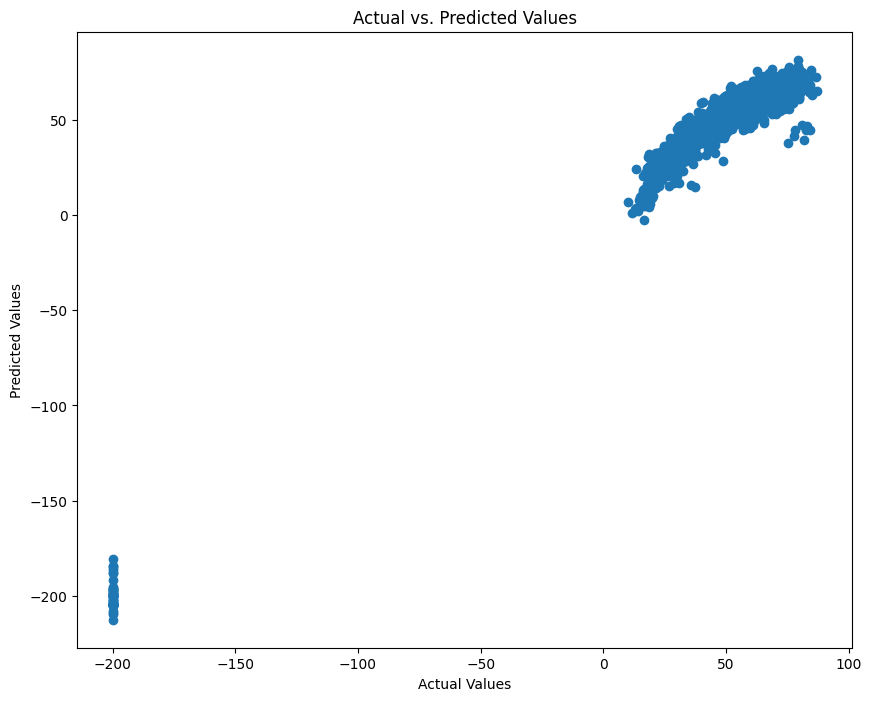

In [34]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()
